<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/PCA%20of%20Student%20Texts%20by%20Groups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import string
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from pymystem3 import Mystem

# Initialize Mystem
mystem = Mystem()

# Folder path with students' texts
students_path = r"Students_texts"

def lemmatize_text(text):
    lemmas = mystem.lemmatize(text)
    lemmas = [lemma.strip() for lemma in lemmas if lemma.strip() not in string.punctuation]
    return list(set(lemmas))

# Collect unique lemmas for each file
all_texts = {'A1': [], 'A2': [], 'B1': [], 'B2': []}
folders = ["A1", "A2", "B1", "B2"]

for folder in folders:
    folder_path = os.path.join(students_path, folder)
    for file_path in glob.glob(folder_path + "/*.txt"):
        with open(file_path, "r", encoding='utf-8') as file:
            text = file.read()
            unique_lemmas = lemmatize_text(text)
            all_texts[folder].append(' '.join(unique_lemmas))

# Combine all texts for vectorization
texts_combined = []
labels = []

for level in folders:
    texts_combined.extend(all_texts[level])
    labels.extend([level] * len(all_texts[level]))

# Create a CountVectorizer instance to convert text to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts_combined)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Define the mapping from original labels to group names and colors
label_mapping = {'A1': 'Group 1', 'A2': 'Group 2', 'B1': 'Group 3', 'B2': 'Group 4'}
colors = {'Group 1': 'red', 'Group 2': 'blue', 'Group 3': 'green', 'Group 4': 'purple'}

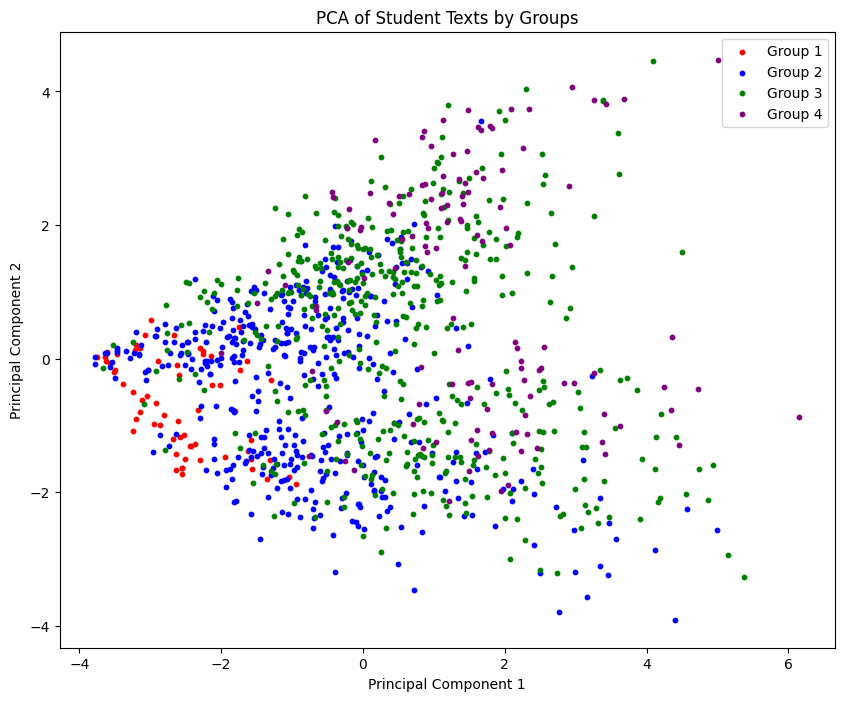

In [ ]:
# Plot the PCA results
plt.figure(figsize=(10, 8))

for level in folders:
    group_label = label_mapping[level]
    idxs = [i for i, label in enumerate(labels) if label == level]
    plt.scatter(X_pca[idxs, 0], X_pca[idxs, 1], c=colors[group_label], label=group_label, s=10)  # Reduced size

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Student Texts by Groups')
plt.legend()
plt.show()

Installing mystem to /root/.local/bin/mystem from http://download.cdn.yandex.net/mystem/mystem-3.1-linux-64bit.tar.gz


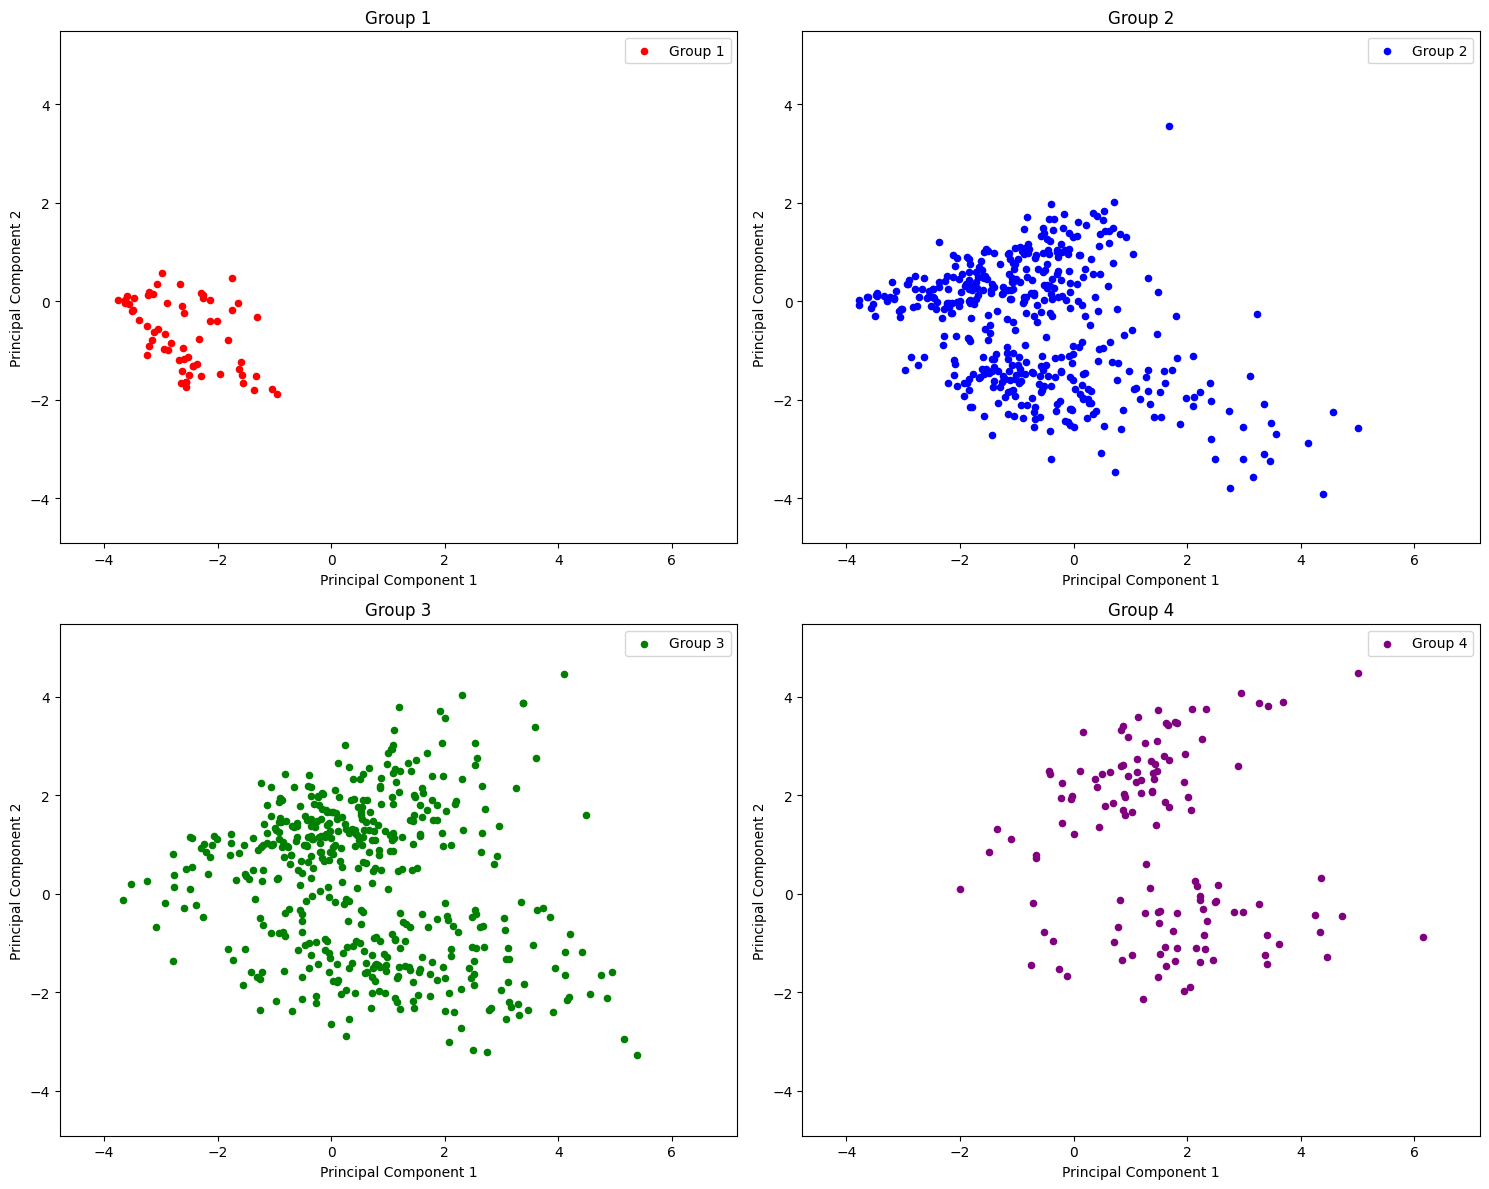

In [1]:
import os
import glob
import string
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from pymystem3 import Mystem

# Initialize Mystem
mystem = Mystem()

# Folder path with students' texts
students_path = r"Students_texts"

def lemmatize_text(text):
    lemmas = mystem.lemmatize(text)
    lemmas = [lemma.strip() for lemma in lemmas if lemma.strip() not in string.punctuation]
    return list(set(lemmas))

# Collect unique lemmas for each file
all_texts = {'A1': [], 'A2': [], 'B1': [], 'B2': []}
folders = ["A1", "A2", "B1", "B2"]

for folder in folders:
    folder_path = os.path.join(students_path, folder)
    for file_path in glob.glob(folder_path + "/*.txt"):
        with open(file_path, "r", encoding='utf-8') as file:
            text = file.read()
            unique_lemmas = lemmatize_text(text)
            all_texts[folder].append(' '.join(unique_lemmas))

# Combine all texts for vectorization
texts_combined = []
labels = []

for level in folders:
    texts_combined.extend(all_texts[level])
    labels.extend([level] * len(all_texts[level]))

# Create a CountVectorizer instance to convert text to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts_combined)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Define the mapping from original labels to group names and colors
label_mapping = {'A1': 'Group 1', 'A2': 'Group 2', 'B1': 'Group 3', 'B2': 'Group 4'}
colors = {'Group 1': 'red', 'Group 2': 'blue', 'Group 3': 'green', 'Group 4': 'purple'}

# Determine the limits for the axes
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

# Plot the PCA results in separate plots for each group
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']
axes_flat = axes.flatten()

for i, level in enumerate(folders):
    group_label = label_mapping[level]
    idxs = [i for i, label in enumerate(labels) if label == level]
    ax = axes_flat[i]
    ax.scatter(X_pca[idxs, 0], X_pca[idxs, 1], c=colors[group_label], label=group_label, s=20)
    ax.set_title(group_label)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.legend()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()